In [1]:
import sys, os, json, subprocess

## for data
import pandas as pd
import numpy as np
import datetime

## for machine learning
from scipy import stats
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sklearn.datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import TransformerMixin
from pandarallel import pandarallel
import multiprocessing

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
    
%matplotlib inline

In [4]:
num_processors = multiprocessing.cpu_count()
num_processors

workers = num_processors-1

print(f'Using {workers} workers')

Using 7 workers


In [5]:
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [68]:
# Helper Functions
def summarize_df(df):
    for col in df.columns:
        print("#####################")
        print("Column: ", col)
        print(round(df[col].value_counts(dropna = False)/len(df),6).head(10))
        print("")
        
def classification_summary(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    print(cf)
    print('Precision: %.3f' % precision_score(y_true, y_pred))
    print('Recall: %.3f' % recall_score(y_true, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
    print('F1 Score: %.3f' % f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    
# Create Penn Color Palette
gyr = ['#011F58', '#333333', '#82AFD3', '#999999', '#CCCCCC', '#990000']
penn_palette = ListedColormap(sns.color_palette(gyr))
plt.rcParams["figure.dpi"] = 150

def bivariate_plots(feature, response, data):
    df_to_plot = pd.crosstab(data[feature], data[response], normalize = "index")
    df_to_plot.plot(kind='bar', stacked = True, figsize = (10,5),
                    title = "Response: " + response, ylabel = "Proportion",
                    width = 0.8, colormap = penn_palette).legend(loc='best')

In [6]:
pd.set_option("display.max_columns", 165)

In [6]:
data_path = "/Users/sanchit/Desktop/Data Mining/Final project/"
file_path = data_path + "HEV_article_2018.csv"

In [7]:
df = pd.read_csv(file_path)

In [9]:
df.head(10)

,Gender,Age,Education_level,All_region,All_region_recode,Employment_status,Household_members_number,Income_group,Urbanization_group,Centre_Suburbs,Driving_ability_self_evaluation,Number_vehicles_household,Plan_to_purchase_vehicle,Car_sharing_,Urban_frequent_destination_,Frequency_frequent_trip_,Passengers_last_trip,Distance_last_trip,Connection_experience_,LDT1,LDT2,LDT3,Leisure_trips_number,Multimodal_experience_evaluation_,ICT_application_use_1_,ICT_application_use_2_,ICT_application_use_3_,frequency_webpage_flight_checkin,ICT_application_use_5_,frequency_smartphone_flight_checkin,ICT_application_use_7_,ICT_application_use_8_,ICT_application_use_9_,ICT_application_use_10_,Teleworking,Online_shopping,Country,Vehicles_per_household_member,buy_electric,Mode_frequent_trip_T1_1,Mode_frequent_trip_T1_2,Mode_frequent_trip_T1_3,Mode_frequent_trip_T1_4,Mode_frequent_trip_T1_5,Mode_frequent_trip_T1_6,Mode_frequent_trip_T1_7,Mode_frequent_trip_T1_8,Mode_frequent_trip_T1_9,Mode_frequent_trip_T1_10,Mode_frequent_trip_T1_11,Mode_frequent_trip_T1_12,Travel_time_frequent_trip,Speed_frequent_trip,Passengers_per_household_member,Ratio_trip_work_leisure,Urban_centre,MLE_region,MLE_country,av_speed_region,av_speed_country,av_time_region,av_time_country,av_distance_region,av_distance_country,av_vehicles_region,av_vehicles_country,teleworking1_region,teleworking1_country,teleworking2_region,teleworking2_country,online1_region,online1_country,online2_region,online2_country,urbanization1_region,urbanization1_country,urbanization2_region,urbanization2_country,urbanization3_region,urbanization3_country,urbanization4_region,urbanization4_country,urbanization_region_likelihood,MLE_country_urb,av_speed_region_urb,av_speed_country_urb,av_time_region_urb,av_time_country_urb,av_distance_region_urb,av_distance_country_urb,av_vehicles_region_urb,av_vehicles_country_urb,income_region_likelihood,MLE_country_inc,av_speed_region_inc,av_speed_country_inc,av_time_region_inc,av_time_country_inc,av_distance_region_inc,av_distance_country_inc,av_vehicles_region_inc,av_vehicles_country_inc,education_region_likelihood,MLE_country_edu,av_speed_region_edu,av_speed_country_edu,av_time_region_edu,av_time_country_edu,av_distance_region_edu,av_distance_country_edu,av_vehicles_region_edu,av_vehicles_country_edu,centre_suburbs_region_likelihood,MLE_country_cen,av_speed_region_cen,av_speed_country_cen,av_time_region_cen,av_time_country_cen,av_distance_region_cen,av_distance_country_cen,av_vehicles_region_cen,av_vehicles_country_cen,online_shopping_region_likelihood,MLE_country_onl,av_speed_region_onl,av_speed_country_onl,av_time_region_onl,av_time_country_onl,av_distance_region_onl,av_distance_country_onl,av_vehicles_region_onl,av_vehicles_country_onl,telework_region_likelihood,MLE_country_tel,av_speed_region_tel,av_speed_country_tel,av_time_region_tel,av_time_country_tel,av_distance_region_tel,av_distance_country_tel,av_vehicles_region_tel,av_vehicles_country_tel,gender_region_likelihood,MLE_country_gen,av_speed_region_gen,av_speed_country_gen,av_time_region_gen,av_time_country_gen,av_distance_region_gen,av_distance_country_gen,av_vehicles_region_gen,av_vehicles_country_gen,age_region_likelihood,MLE_country_age,av_speed_region_age,av_speed_country_age,av_time_region_age,av_time_country_age,av_distance_region_age,av_distance_country_age,av_vehicles_region_age,av_vehicles_country_age,count_region,online_x_telework,online_shopping_region_likelihoodxtel
0,1,59,1,3,2,5,2,4,1,1,1,1,4,1,1,3,2,3,2,0,0,30,38,0,3,3,5,5,5,5,4,4,4,4,5,5,1,0.500000,0,0,0,0,1,0,0,0,0,1,0,0,0,20.0,9.000000,1.0,0.789474,11,0.534247,0.480432,6.121276,9.062626,37.547945,30.71525,3.212329,3.663968,0.569977,0.704656,0.054795,0.067476,0.102740,0.087719,0.321918,0.358974,0.383562,0.377868,0.952055,0.194332,0.047945,0.067476,0.000000,0.296896,0.000000,0.441296,0.546763,0.534722,6.140094,6.204674,37.870504,37.215278,3.237410,3.208333,0.578777,0.588773,0.521739,0.486486,6.561710,9.687855,32.565217,27.244595,3.086957,3

## Train - Test Split and scaling

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify=y , test_size=0.3, random_state=11)

In [47]:
dp_scale = X_train

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dp_scaled = scaler.fit_transform(dp_scale)

dp_scaled = pd.DataFrame(dp_scaled, columns=dp_scale.columns)

X_train = dp_scaled
X_train.head()

,Gender,Income_group,Centre_Suburbs,Plan_to_purchase_vehicle,Car_sharing_,Passengers_last_trip,LDT3,Leisure_trips_number,ICT_application_use_2_,ICT_application_use_5_,ICT_application_use_8_,Teleworking,Country,Mode_frequent_trip_T1_3,Mode_frequent_trip_T1_7,Passengers_per_household_member,Urban_centre
0,-0.986264,-0.255621,1.066007,1.576396,-0.291167,-0.200531,-0.190684,-0.529122,-0.718926,-2.437653,0.215905,0.542863,-0.299595,-0.056639,-0.048205,-0.533519,-1.906454
1,1.013927,-0.255621,-1.470309,0.658245,-0.291167,-0.200531,-0.370135,-0.529122,1.101713,0.232296,0.215905,-1.023614,-0.545124,-0.056639,-0.048205,0.051579,1.190883
2,1.013927,0.840185,-0.202151,0.658245,-2.677940,-0.200531,-0.011233,-0.317212,-0.718926,0.232296,0.215905,0.542863,0.436992,-0.056639,-0.048205,1.221774,-0.910882
3,-0.986264,0.840185,1.066007,-0.259907,-0.291167,-0.200531,-0.370135,0.318517,-0.718926,0.232296,0.215905,0.542863,-0.545124,-0.056639,-0.048205,0.051579,0.305929
4,1.013927,3.031796,1.066007,0.658245,-0.291167,-0.200531,-0.370135,-0.529122,1.101713,1.122280,1.190909,-0.240375,0.805286,-0.056639,-0.048205,-0.338487,0.305929


In [48]:
dp_scale1 = X_test

from sklearn.preprocessing import StandardScaler

dp_scaled1 = scaler.transform(dp_scale1)

dp_scaled1 = pd.DataFrame(dp_scaled1, columns=dp_scale1.columns)

X_test = dp_scaled1
X_test.head()

,Gender,Income_group,Centre_Suburbs,Plan_to_purchase_vehicle,Car_sharing_,Passengers_last_trip,LDT3,Leisure_trips_number,ICT_application_use_2_,ICT_application_use_5_,ICT_application_use_8_,Teleworking,Country,Mode_frequent_trip_T1_3,Mode_frequent_trip_T1_7,Passengers_per_household_member,Urban_centre
0,1.013927,-0.255621,-0.202151,0.658245,-0.291167,-1.173927,-0.370135,-0.317212,0.191394,0.232296,0.215905,0.542863,1.541874,-0.056639,-0.048205,-1.118617,-0.910882
1,-0.986264,-0.255621,-1.470309,0.658245,-0.291167,-0.200531,-0.190684,-0.529122,0.191394,1.122280,1.190909,0.542863,1.296345,-0.056639,-0.048205,-0.338487,1.190883
2,1.013927,1.935990,1.066007,1.576396,-0.291167,2.719658,-0.190684,-0.317212,1.101713,0.232296,0.215905,0.542863,0.068699,-0.056639,-0.048205,1.221774,0.305929
3,-0.986264,-0.255621,-0.202151,-0.259907,2.095605,-0.200531,-0.190684,-0.317212,0.191394,1.122280,1.190909,0.542863,1.419109,-0.056639,-0.048205,-0.533519,0.195310
4,1.013927,1.935990,-1.470309,-0.259907,-0.291167,0.772865,-0.370135,-0.529122,0.191394,1.122280,1.190909,0.542863,-0.422360,-0.056639,-0.048205,1.221774,1.190883


## Modeling and Evaluation

In [55]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'])

In [56]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# svm = SVC(probability=True)
xgb = XGBClassifier()


LogisticRegression Feature Importance:
1. Gender: -0.1323
2. Income_group: -0.0308
3. Centre_Suburbs: -0.0382
4. Plan_to_purchase_vehicle: 0.0250
5. Car_sharing_: -0.1381
6. Passengers_last_trip: 0.0581
7. LDT3: 0.0363
8. Leisure_trips_number: -0.0112
9. ICT_application_use_2_: -0.0533
10. ICT_application_use_5_: -0.1298
11. ICT_application_use_8_: -0.1145
12. Teleworking: -0.1281
13. Country: 0.1099
14. Mode_frequent_trip_T1_3: 0.0079
15. Mode_frequent_trip_T1_7: -0.0114
16. Passengers_per_household_member: -0.0679
17. Urban_centre: -0.1960


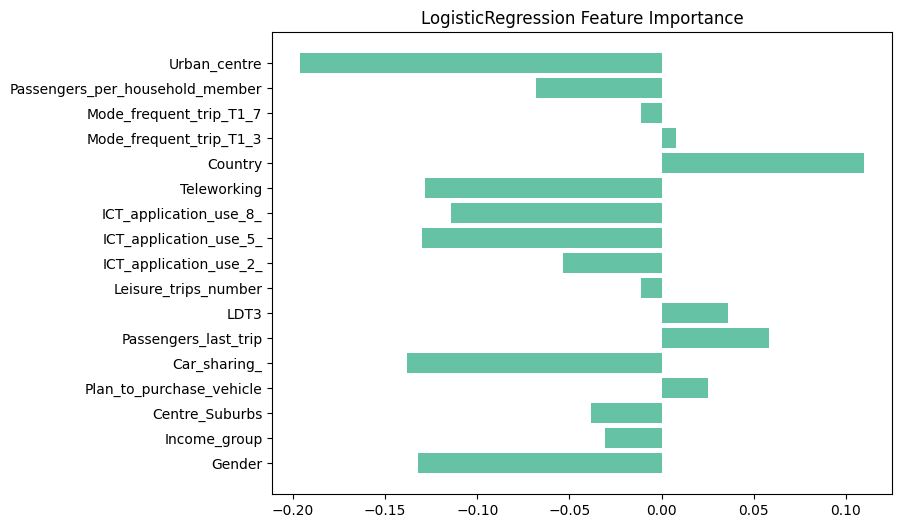


DecisionTreeClassifier Feature Importance:
1. Gender: 0.0257
2. Income_group: 0.0807
3. Centre_Suburbs: 0.0249
4. Plan_to_purchase_vehicle: 0.0876
5. Car_sharing_: 0.0339
6. Passengers_last_trip: 0.0528
7. LDT3: 0.0842
8. Leisure_trips_number: 0.1048
9. ICT_application_use_2_: 0.0825
10. ICT_application_use_5_: 0.0505
11. ICT_application_use_8_: 0.0572
12. Teleworking: 0.0329
13. Country: 0.1328
14. Mode_frequent_trip_T1_3: 0.0011
15. Mode_frequent_trip_T1_7: 0.0007
16. Passengers_per_household_member: 0.0945
17. Urban_centre: 0.0533


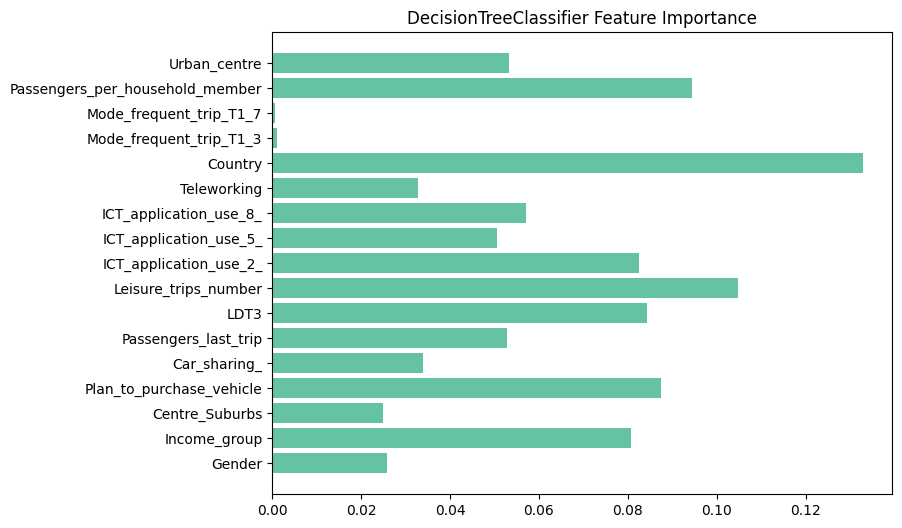


RandomForestClassifier Feature Importance:
1. Gender: 0.0276
2. Income_group: 0.0740
3. Centre_Suburbs: 0.0313
4. Plan_to_purchase_vehicle: 0.0786
5. Car_sharing_: 0.0295
6. Passengers_last_trip: 0.0553
7. LDT3: 0.0695
8. Leisure_trips_number: 0.0914
9. ICT_application_use_2_: 0.0760
10. ICT_application_use_5_: 0.0551
11. ICT_application_use_8_: 0.0522
12. Teleworking: 0.0425
13. Country: 0.1596
14. Mode_frequent_trip_T1_3: 0.0010
15. Mode_frequent_trip_T1_7: 0.0007
16. Passengers_per_household_member: 0.0947
17. Urban_centre: 0.0610


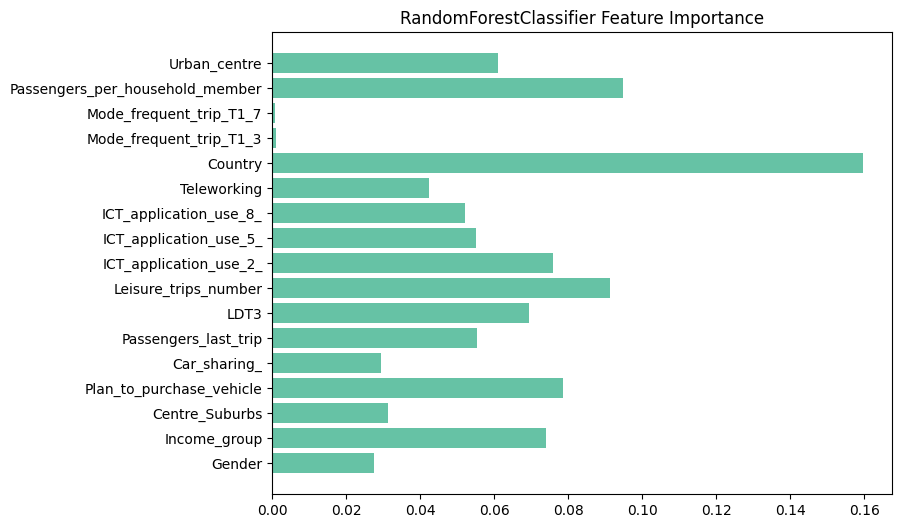


XGBClassifier Feature Importance:
1. Gender: 0.0732
2. Income_group: 0.0582
3. Centre_Suburbs: 0.0580
4. Plan_to_purchase_vehicle: 0.0604
5. Car_sharing_: 0.0746
6. Passengers_last_trip: 0.0500
7. LDT3: 0.0501
8. Leisure_trips_number: 0.0524
9. ICT_application_use_2_: 0.0585
10. ICT_application_use_5_: 0.0898
11. ICT_application_use_8_: 0.0645
12. Teleworking: 0.0697
13. Country: 0.0788
14. Mode_frequent_trip_T1_3: 0.0336
15. Mode_frequent_trip_T1_7: 0.0082
16. Passengers_per_household_member: 0.0536
17. Urban_centre: 0.0665


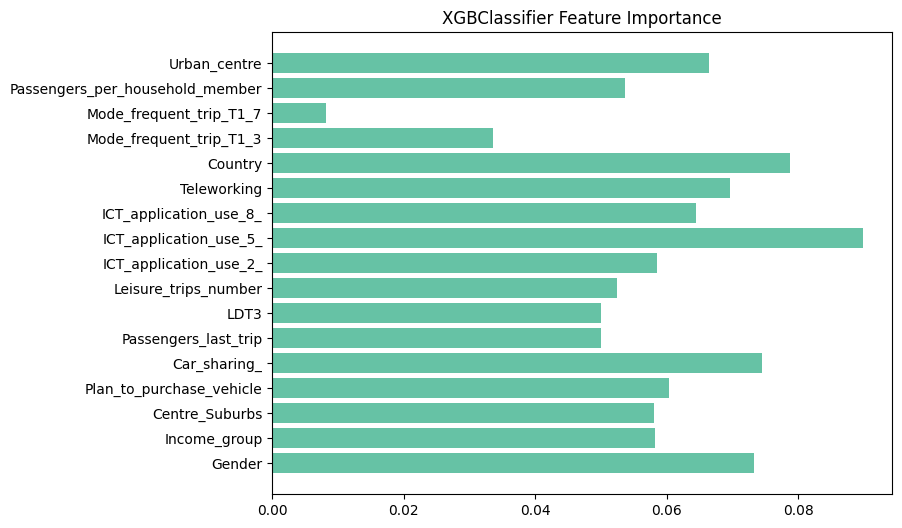

In [57]:
for model in [lr,dt,rf,xgb]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculating performance metrics
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    auc_roc = round(roc_auc_score(y_test, y_prob), 2)
    
    # Extracting feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importance = model.coef_.flatten()
    else:
        feature_importance = None
    
    # Adding results to the dataframe
    results_df = results_df.append({'Model': type(model).__name__, 'Accuracy': accuracy, 
                                    'Precision': precision, 'Recall': recall, 
                                    'F1-score': f1, 'AUC-ROC': auc_roc}, ignore_index=True)
                                    #'Feature Importance': feature_importance}, ignore_index=True#

    # Displaying feature importance separately for each model
    if feature_importance is not None:
        print(f"\n{type(model).__name__} Feature Importance:")
        for i, feat in enumerate(feature_importance):
            print(f"{i+1}. {X_train.columns[i]}: {feat:.4f}")
            
        # Plotting feature importance separately for each model
    if feature_importance is not None:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.barh(X_train.columns, feature_importance)
        ax.set_title(f"{type(model).__name__} Feature Importance")
        plt.show()

In [62]:
results_df.sort_values(by='AUC-ROC', ascending=False, inplace=True)

In [63]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
3,XGBClassifier,0.61,0.53,0.37,0.44,0.62
0,LogisticRegression,0.62,0.57,0.23,0.33,0.61
2,RandomForestClassifier,0.60,0.51,0.32,0.39,0.60
1,DecisionTreeClassifier,0.55,0.45,0.45,0.45,0.54


In [64]:
from sklearn.model_selection import cross_val_score, KFold

# Define cross-validation method (e.g. 5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=True, random_state=11)

# Evaluate model using cross-validation
scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='roc_auc')

# Print mean and standard deviation of scores
print("Cross-validation scores:", scores)
print("Mean roc_auc score:", scores.mean())
print("Standard deviation of roc_auc score:", scores.std())

Cross-validation scores: [0.56553659 0.57632308 0.56786553 0.5833367  0.58520076]
Mean roc_auc score: 0.5756525321542266
Standard deviation of roc_auc score: 0.007920032404665475


In [65]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [71]:
oversample = RandomOverSampler(sampling_strategy='minority')
undersample = RandomUnderSampler(sampling_strategy='majority')

# X_train, y_train = oversample.fit_resample(X_train, y_train)
X_over, y_over = oversample.fit_resample(X_new, y)

### Explanatory model

[[10650     8]
 [   16 10642]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10658
           1       1.00      1.00      1.00     10658

    accuracy                           1.00     21316
   macro avg       1.00      1.00      1.00     21316
weighted avg       1.00      1.00      1.00     21316



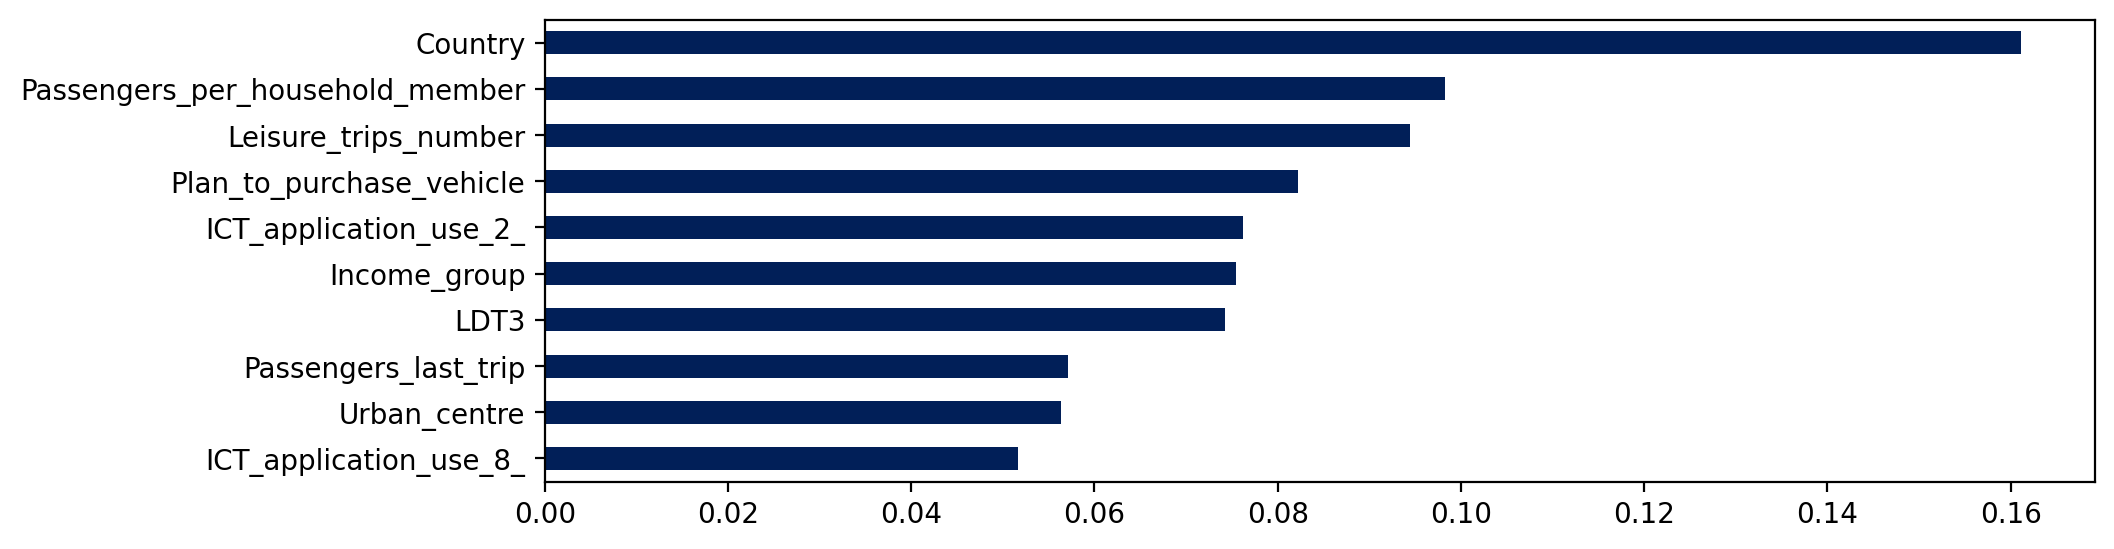

In [73]:
#oversampled data

classifier_1d = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier_1d.fit(X_over, y_over)

feat_importances_1d = pd.Series(classifier_1d.feature_importances_, index=X_new.columns)
plt.figure(figsize=(10,3), dpi = 200)

feat_importances_1d.nlargest(10).plot(kind='barh', colormap = penn_palette).invert_yaxis()

y_pred_1d = classifier_1d.predict(X_over)

print(confusion_matrix(y_over.values, y_pred_1d))
print(classification_report(y_over.values, y_pred_1d))

### Spline Model 

In [85]:
spline_model = make_pipeline(StandardScaler(), PolynomialFeatures(2), Ridge(alpha=0.01))
spline_model.fit(X_train, y_train)

spline_tr_pred = spline_model.predict(X_train)
spline_ts_pred = spline_model.predict(X_test)

print("roc_auc_score:", round(roc_auc_score(y_train, np.round(spline_tr_pred)), 2))
print("roc_auc_score:", round(roc_auc_score(y_test, np.round(spline_ts_pred)), 2))

roc_auc_score: 0.58
roc_auc_score: 0.55


In [76]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
results = permutation_importance(spline_model, X_test, y_test, n_repeats=10, random_state=0)
importance = results.importances_mean

In [77]:
# Get the list of feature names
feature_names1 = X_test.columns

# Sort the list of feature importances in descending order
sorted_idx = importance.argsort()[::-1]

# Print the ordered list of important features
print("Ordered list of important features:")
for i in sorted_idx:
    print("{}: {:.4f}".format(feature_names1[i], importance[i]))

Ordered list of important features:
Passengers_last_trip: 0.0218
Urban_centre: 0.0116
Passengers_per_household_member: 0.0115
Plan_to_purchase_vehicle: 0.0082
ICT_application_use_8_: 0.0081
Teleworking: 0.0078
ICT_application_use_5_: 0.0076
Country: 0.0067
Car_sharing_: 0.0058
Gender: 0.0051
Centre_Suburbs: 0.0047
Leisure_trips_number: 0.0029
LDT3: 0.0016
ICT_application_use_2_: 0.0011
Mode_frequent_trip_T1_3: 0.0001
Income_group: -0.0004
Mode_frequent_trip_T1_7: -0.0012


In [78]:
X_train.columns

Index(['Gender', 'Income_group', 'Centre_Suburbs', 'Plan_to_purchase_vehicle',
       'Car_sharing_', 'Passengers_last_trip', 'LDT3', 'Leisure_trips_number',
       'ICT_application_use_2_', 'ICT_application_use_5_',
       'ICT_application_use_8_', 'Teleworking', 'Country',
       'Mode_frequent_trip_T1_3', 'Mode_frequent_trip_T1_7',
       'Passengers_per_household_member', 'Urban_centre'],
      dtype='object')

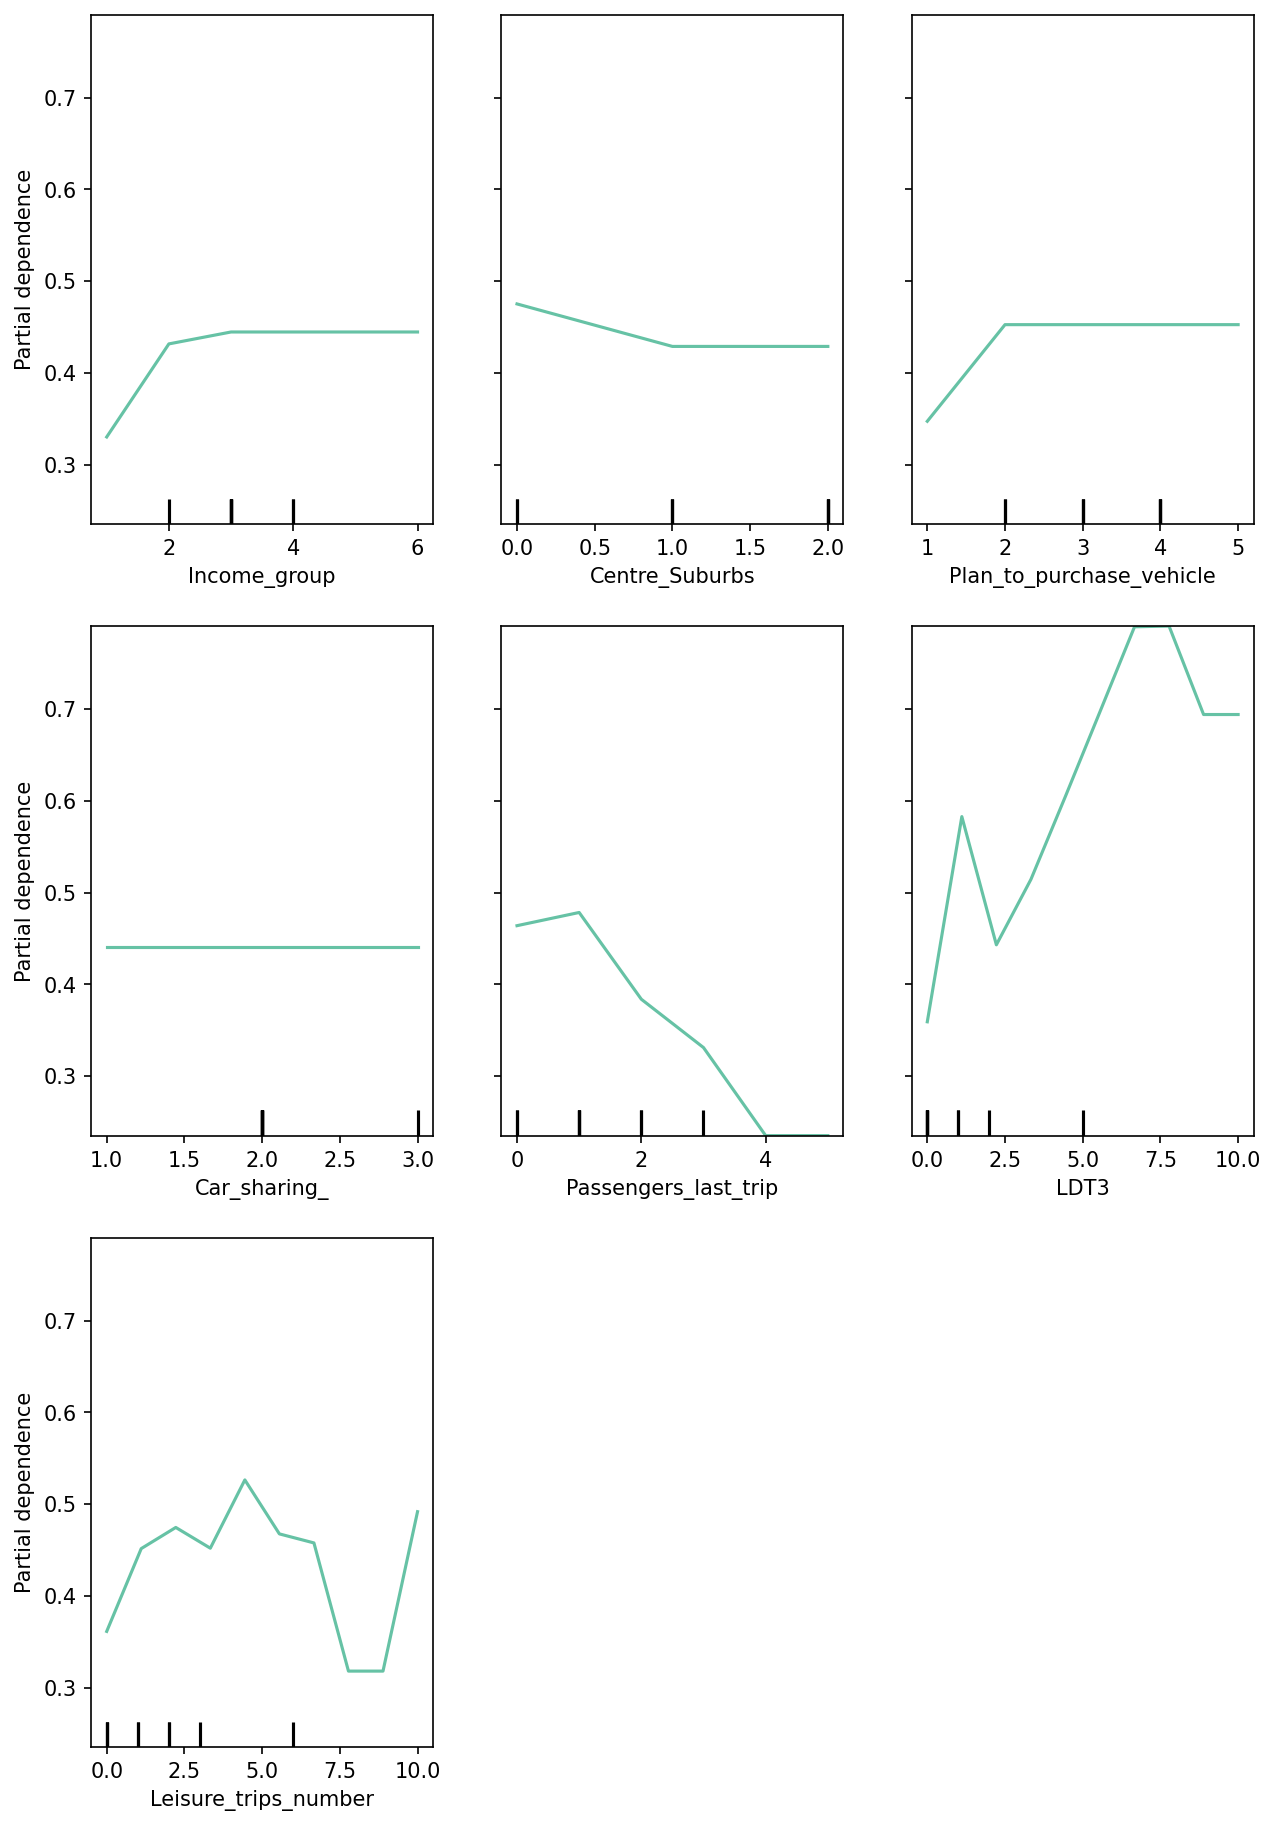

In [84]:
fig, ax = plt.subplots(figsize=(10, 15))  
display = plot_partial_dependence(
    estimator=model,
    X=X_new,
    features=[1,2,3,4,5,6,7],
    target=1,
    grid_resolution=10,
    ax=ax  
)

plt.show()


## Visualisation 

In [116]:
country_dict = {
    1: 'Austria',
    2: 'Belgium',
    3: 'Bulgaria',
    4: 'Croatia',
    5: 'Czech Republic',
    6: 'Denmark',
    7: 'Estonia',
    8: 'Finland',
    9: 'France',
    10: 'Germany',
    11: 'Greece',
    12: 'Hungary',
    13: 'Ireland',
    14: 'Italy',
    15: 'Latvia',
    16: 'Lithuania',
    17: 'Netherlands',
    18: 'Poland',
    19: 'Portugal',
    20: 'Romania',
    21: 'Slovakia',
    22: 'Slovenia',
    23: 'Spain',
    24: 'Sweden',
    25: 'Great Britain',
    26: 'Malta',
    27: 'Luxembourg',
    28: 'Cyprus'
}

In [117]:
df1 = df.copy()

In [118]:
df1['country_name'] = df['All_region'].map(country_dict)

In [124]:
import plotly.express as px
# Aggregate the data by country and count the number of "Yes" values
counts = df1.groupby('country_name')['buy_electric'].apply(lambda x: (x == 1).sum()).reset_index()

# Plot the map with the count data
fig = px.choropleth(counts, locations='country_name', locationmode='country names',
                    color='buy_electric', range_color=[0, counts['buy_electric'].max()],
                    color_continuous_scale='Blues', labels={'buy_electric': 'Buy Electric Count'})
fig.update_layout(title='Buy Electric Count by EU Country')
fig.show()

In [127]:
df_ranked = counts.sort_values('buy_electric')
df_ranked

,country_name,buy_electric
22,Portugal,3
4,Cyprus,3
23,Romania,10
17,Lithuania,12
13,Hungary,14
21,Poland,14
20,Netherlands,15
10,Germany,17
9,France,17
0,Austria,20


In [120]:
counts = df1.groupby('country_name')['Plan_to_purchase_vehicle'].apply(lambda x: (x <= 3).sum()).reset_index()

# Plot the map with the count data
fig = px.choropleth(counts, locations='country_name', locationmode='country names',
                    color='Plan_to_purchase_vehicle', range_color=[0, counts['Plan_to_purchase_vehicle'].max()],
                    color_continuous_scale='Blues', labels={'Plan_to_purchase_vehicle': 'Plan to purchase Evehicle Count'})
fig.update_layout(title='Plan to purchase Evehicle by EU Country')
fig.show()

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


model = TSNE(n_components=2 , random_state=0)
#configuring the parameteres 
# the number of components = 2 
# default perplexity =30 
# default learning rate = 200 
# default Maximum number of iterations for the optimization 1000

tsne_data = model.fit_transform(X)

#creating ne df which will help us in plotting result 
tsne_data = np.vstack((tsne_data.T,y)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','buy_electric'))


# sns.FacetGrid(tsne_df, hue="buy_electric").map(plt.scatter, 'Dim_1', 'Dim_2')
# plt.show()


sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="buy_electric", palette=["red", "green"])
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c=y)
# plt.show()

In [ ]:
model = TSNE(n_components=2 , random_state=0)
#configuring the parameteres 
# the number of components = 2 
# default perplexity =30 
# default learning rate = 200 
# default Maximum number of iterations for the optimization 1000

tsne_data = model.fit_transform(X)

#creating ne df which will help us in plotting result 
tsne_data = np.vstack((tsne_data.T,y)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1', 'Dim_2','plan_to_purchase'))


# sns.FacetGrid(tsne_df, hue="buy_electric").map(plt.scatter, 'Dim_1', 'Dim_2')
# plt.show()


sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="plan_to_purchase", palette=["red", "green",'blue','yellow','purple'])
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c=y)
# plt.show() 


In [93]:
df

,Gender,Age,Education_level,All_region,All_region_recode,Employment_status,Household_members_number,Income_group,Urbanization_group,Centre_Suburbs,Driving_ability_self_evaluation,Number_vehicles_household,Plan_to_purchase_vehicle,Car_sharing_,Urban_frequent_destination_,Frequency_frequent_trip_,Passengers_last_trip,Distance_last_trip,Connection_experience_,LDT1,LDT2,LDT3,Leisure_trips_number,Multimodal_experience_evaluation_,ICT_application_use_1_,ICT_application_use_2_,ICT_application_use_3_,frequency_webpage_flight_checkin,ICT_application_use_5_,frequency_smartphone_flight_checkin,ICT_application_use_7_,ICT_application_use_8_,ICT_application_use_9_,ICT_application_use_10_,Teleworking,Online_shopping,Country,Vehicles_per_household_member,buy_electric,Mode_frequent_trip_T1_1,Mode_frequent_trip_T1_2,Mode_frequent_trip_T1_3,Mode_frequent_trip_T1_4,Mode_frequent_trip_T1_5,Mode_frequent_trip_T1_6,Mode_frequent_trip_T1_7,Mode_frequent_trip_T1_8,Mode_frequent_trip_T1_9,Mode_frequent_trip_T1_10,Mode_frequent_trip_T1_11,Mode_frequent_trip_T1_12,Travel_time_frequent_trip,Speed_frequent_trip,Passengers_per_household_member,Ratio_trip_work_leisure,Urban_centre,Age_bin
0,1,59,1,3,2,5,2,4,1,1,1,1,4,1,1,3,2,3,2,0,0,30,38,0,3,3,5,5,5,5,4,4,4,4,5,5,1,0.500000,0,0,0,0,1,0,0,0,0,1,0,0,0,20.0,9.000000,1.00,0.789474,11,Senior
1,1,45,1,2,1,1,2,3,4,0,1,1,3,2,1,2,1,5,2,2,2,5,5,0,1,3,1,1,3,1,3,3,2,3,1,2,1,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,30.0,10.000000,0.50,1.000000,40,adult
2,1,62,2,6,4,5,3,3,3,2,2,2,3,2,1,2,0,1,0,30,1,2,1,2,3,4,3,3,4,2,2,4,4,4,5,4,1,0.666667,1,0,0,0,0,0,0,0,0,0,1,0,0,15.0,4.000000,0.00,2.000000,32,Senior
3,1,21,3,3,2,4,3,5,1,1,2,0,2,2,1,2,0,2,0,0,3,0,0,0,4,1,4,4,4,4,4,4,4,4,5,2,1,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,40.0,3.000000,0.00,0.000000,11,child
4,2,54,2,3,2,1,1,4,1,2,1,1,3,2,1,1,1,3,3,0,0,1,1,0,4,4,4,4,4,4,4,4,4,4,3,2,1,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0,12.000000,1.00,1.000000,12,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17865,2,50,4,576,176,1,2,3,3,2,1,1,4,2,3,1,1,6,0,0,0,0,0,0,4,4,2,4,4,4,2,3,2,4,5,1,5,0.500000,1,0,0,0,1,0,0,0,0,0,0,0,0,35.0,10.285714,0.50,0.000000,32,Senior
17866,1,43,4,576,176,1,4,3,4,0,1,2,4,2,3,1,4,3,0,0,1,0,0,1,4,3,1,4,4,4,4,4,3,4,5,2,5,0.500000,1,0,0,0,1,0,0,0,0,0,0,0,0,10.0,18.000000,1.00,0.000000,40,adult
17867,2,46,3,576,176,2,4,3,4,0,1,3,4,2,2,1,1,4,0,0,2,0,1,1,4,3,1,1,4,4,4,4,4,4,5,5,5,0.750000,1,0,0,0,1,0,0,0,0,0,0,0,0,20.0,12.000000,0.25,0.000000,40,adult
17868,1,47,3,576,176,1,4,3,4,0,1,4,4,2,2,1,1,6,0,0,1,0,0,1,4,2,1,1,4,4,4,4,2,4,5,5,5,1.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,40.0,9.000000,0.25,0.000000,40,adult


In [92]:
df.columns

Index(['Gender', 'Age', 'Education_level', 'All_region', 'All_region_recode',
       'Employment_status', 'Household_members_number', 'Income_group',
       'Urbanization_group', 'Centre_Suburbs',
       'Driving_ability_self_evaluation', 'Number_vehicles_household',
       'Plan_to_purchase_vehicle', 'Car_sharing_',
       'Urban_frequent_destination_', 'Frequency_frequent_trip_',
       'Passengers_last_trip', 'Distance_last_trip', 'Connection_experience_',
       'LDT1', 'LDT2', 'LDT3', 'Leisure_trips_number',
       'Multimodal_experience_evaluation_', 'ICT_application_use_1_',
       'ICT_application_use_2_', 'ICT_application_use_3_',
       'frequency_webpage_flight_checkin', 'ICT_application_use_5_',
       'frequency_smartphone_flight_checkin', 'ICT_application_use_7_',
       'ICT_application_use_8_', 'ICT_application_use_9_',
       'ICT_application_use_10_', 'Teleworking', 'Online_shopping', 'Country',
       'Vehicles_per_household_member', 'buy_electric',
       'Mode_freq

## Clustering

In [10]:
X = df[['Gender', 'Age_bin', 'Education_level','Employment_status', 'Household_members_number', 'Income_group','Number_vehicles_household',
       'Car_sharing_','Urban_frequent_destination_','Frequency_frequent_trip_','Vehicles_per_household_member','Online_shopping','Teleworking','ICT_application_use_5_']]

In [11]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()
# encode the categorical variables
X['Age_bin'] = le.fit_transform(X['Age_bin'])

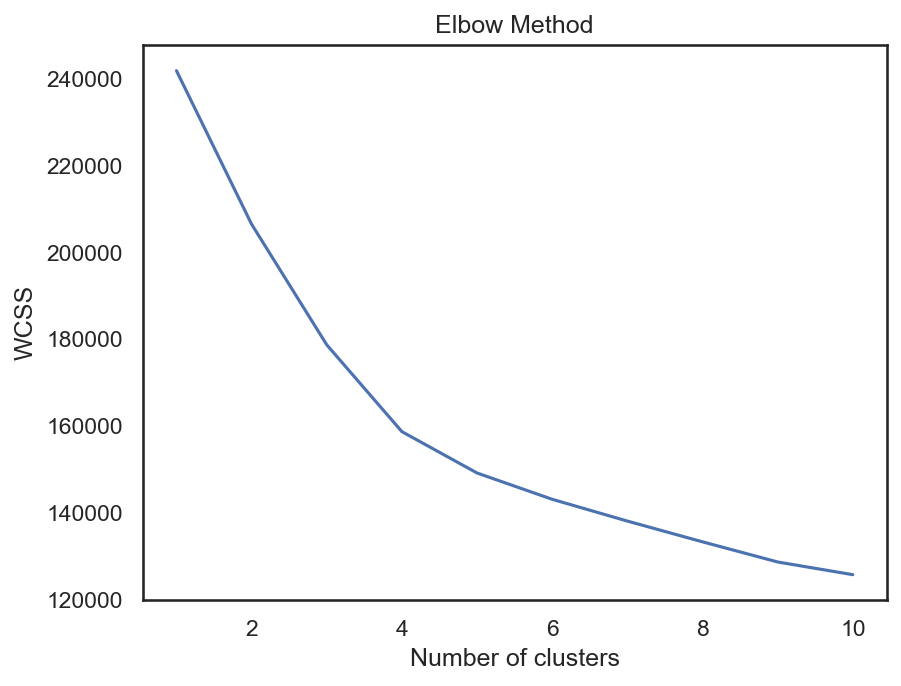

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=11)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=11)
clusters = kmeans.fit_predict(X)

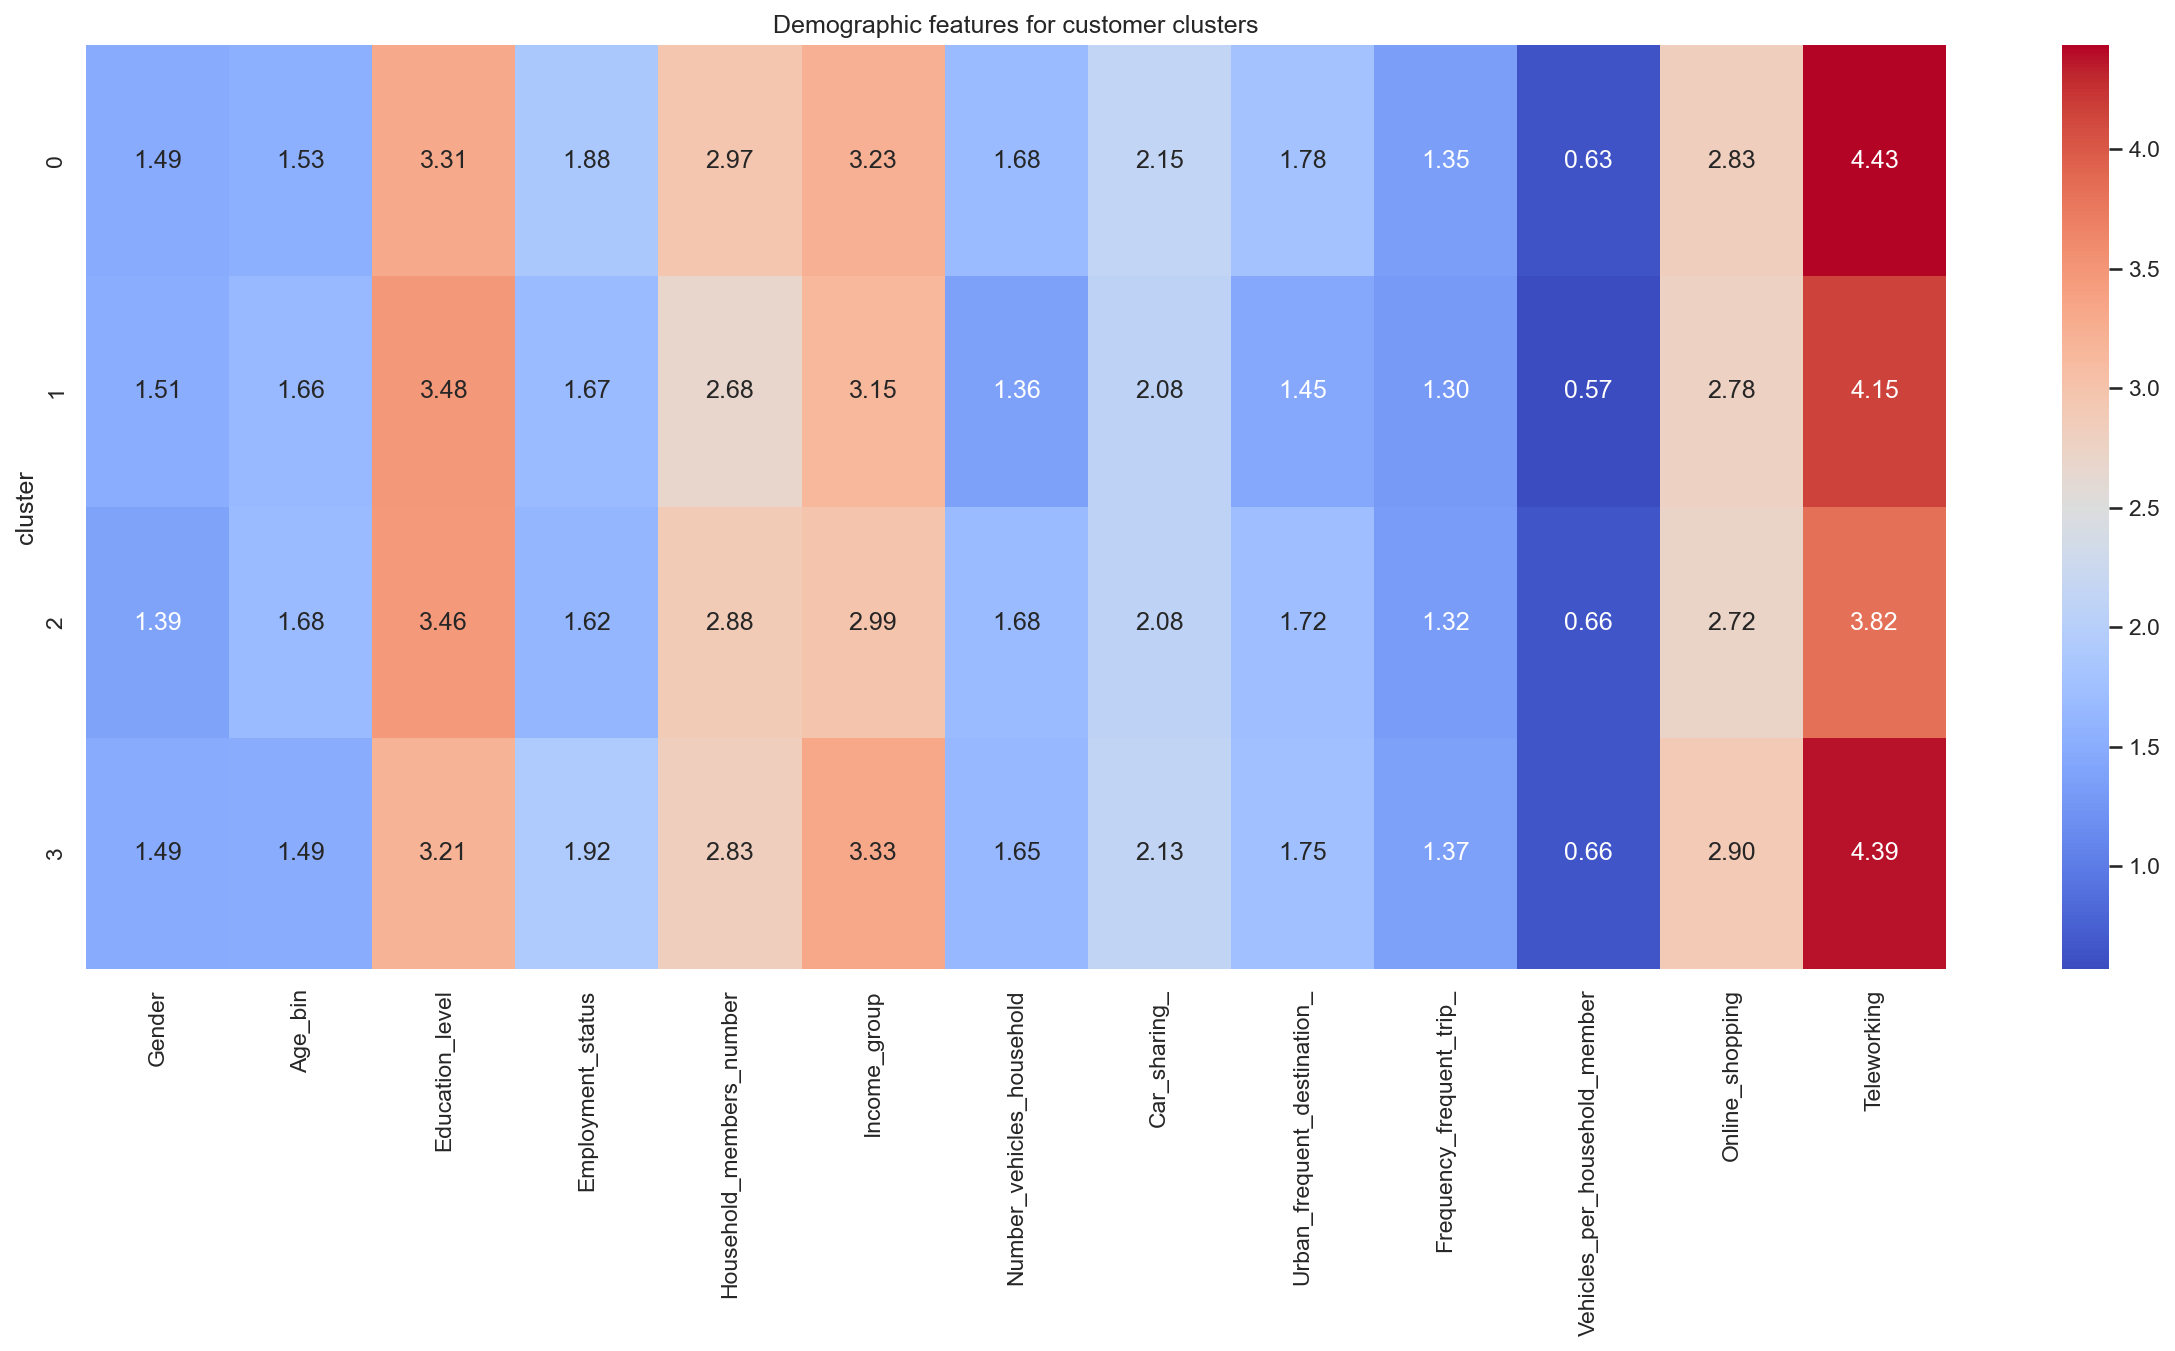

In [99]:
X_df = pd.DataFrame(X, columns=X.columns[:-1])
X_df['cluster'] = clusters
sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(X_df.groupby('cluster').mean(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Demographic features for customer clusters')
plt.show()

## Association rule mining for marketing efforts

In [12]:
X1 = X

In [13]:
X1 = pd.get_dummies(X1, columns=[
                           'Gender', 'Age_bin', 'Education_level','Employment_status', 'Household_members_number', 'Income_group','Number_vehicles_household',
       'Car_sharing_','Urban_frequent_destination_','Frequency_frequent_trip_','Vehicles_per_household_member','Online_shopping','Teleworking','ICT_application_use_5_'], dummy_na = True)

In [14]:
X1['buy_EV'] = df['buy_electric']
X1

,Gender_1.0,Gender_2.0,Gender_nan,Age_bin_0.0,Age_bin_1.0,Age_bin_2.0,Age_bin_3.0,Age_bin_nan,Education_level_1.0,Education_level_2.0,...,Teleworking_4.0,Teleworking_5.0,Teleworking_nan,ICT_application_use_5__1.0,ICT_application_use_5__2.0,ICT_application_use_5__3.0,ICT_application_use_5__4.0,ICT_application_use_5__5.0,ICT_application_use_5__nan,buy_EV
0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17865,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
17866,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
17867,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
17868,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [15]:
# Find all columns with uint8 data type
uint8_cols = X1.select_dtypes(include=['uint8']).columns

# Convert uint8 columns to boolean data type
X1[uint8_cols] = X1[uint8_cols].astype(bool)

In [16]:
X1['buy_EV'] = X1['buy_EV'].astype(bool)
X1

,Gender_1.0,Gender_2.0,Gender_nan,Age_bin_0.0,Age_bin_1.0,Age_bin_2.0,Age_bin_3.0,Age_bin_nan,Education_level_1.0,Education_level_2.0,...,Teleworking_4.0,Teleworking_5.0,Teleworking_nan,ICT_application_use_5__1.0,ICT_application_use_5__2.0,ICT_application_use_5__3.0,ICT_application_use_5__4.0,ICT_application_use_5__5.0,ICT_application_use_5__nan,buy_EV
0,True,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
1,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,True,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
3,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
4,False,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17865,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
17866,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
17867,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
17868,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [17]:
X1 = X1.sample(n=100, random_state=11)

In [18]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(X1, min_support=0.01, use_colnames=True)

In [19]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

In [ ]:
# Filter rules based on the 'buy_EV' column
buy_rules = rules[rules['consequents'].apply(lambda x: 'buy_EV' in x)]

# Print the top 10 rules by lift
print(buy_rules.sort_values('lift', ascending=False).head(10))